In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yellowbrick as yb
%matplotlib inline
%config InlineBackend.figure_format ='retina'
sns.set()

df = pd.read_csv("C:/Users/Jungd/Desktop/Data_Science/myproject/Agency_Full_Clean.csv")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
df.describe()

,employment_count,quit_count,attrition_rate,average_salary,average_service,percent_advance_degrees,percent_female,year,1,2,...,62,63,64,65,66,67,68,69,70,71
count,946.00,946.00,946.00,946.00,946.00,946.00,946.00,946.00,946.00,946.00,...,946.00,946.00,946.00,946.00,946.00,946.00,946.00,946.00,946.00,946.00
mean,7136.61,312.37,4.85,95296.83,14.46,21.63,43.84,2015.01,64.78,71.09,...,55.40,52.76,49.95,49.48,44.63,34.24,50.74,64.68,59.57,57.39
std,24894.71,1170.26,2.52,19245.84,2.96,10.28,15.34,1.43,9.34,7.35,...,10.75,8.25,9.22,8.70,9.66,8.43,9.81,7.47,8.77,9.80
min,34.00,0.00,0.00,41135.00,4.00,0.00,13.00,2013.00,34.15,45.63,...,18.75,27.21,20.61,24.39,14.63,12.27,23.59,35.37,34.46,18.90
25%,563.25,21.00,3.06,79051.00,12.00,14.00,32.00,2014.00,58.17,66.92,...,47.74,47.53,43.78,43.73,38.24,28.53,44.30,60.05,53.53,51.07
50%,1648.00,65.50,4.51,98005.50,14.00,21.00,41.00,2015.00,64.50,70.75,...,54.55,52.22,48.80,48.70,43.78,33.64,49.94,64.38,59.31,56.85
75%,5394.75,273.00,6.13,109386.75,16.00,28.00,57.00,2016.00,70.60,75.46,...,62.58,57.65,55.00,55.00,50.70,38.92,56.66,69.18,65.79,63.57
max,336598.00,16572.00,14.30,159253.00,23.00,60.00,77.00,2017.00,90.00,94.23,...,83.61,86.79,84.91,90.57,79.75,65.38,82.89,88.68,86.79,88.61


In [13]:
# Creating engagement feature
df["engagement"] = (df["40"] + df["69"] + df["71"])/3

## Model 1:  Demographic(4) + Engagment(1) = Attrition(1)

In [14]:
# Creating one target (y) and multiple feature combinations (X, X1, X2, X3); also creates on dataframe with X and y
X5 = df[["average_salary", "average_service", "percent_advance_degrees", "percent_female", "engagement"]]
y = df.attrition_rate
X2 = df[["average_service", "percent_advance_degrees", "percent_female", "engagement"]]
X3 = df[["average_service", "percent_female", "engagement"]]
X4 = df[["average_salary", "percent_female", "engagement"]]
X = df[["average_salary", "percent_advance_degrees", "percent_female", "engagement"]]
df1 = df[["attrition_rate", "average_salary", "average_service", "percent_advance_degrees", "percent_female", "engagement"]]

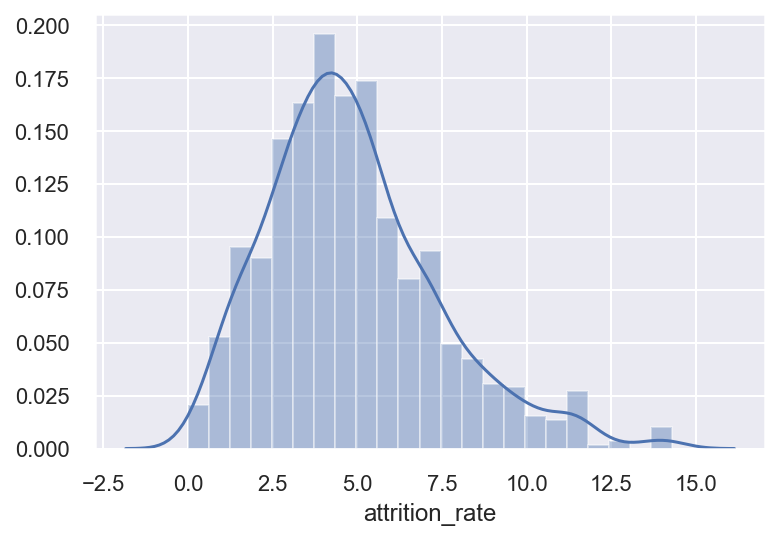

In [15]:
sns.distplot(df.attrition_rate)

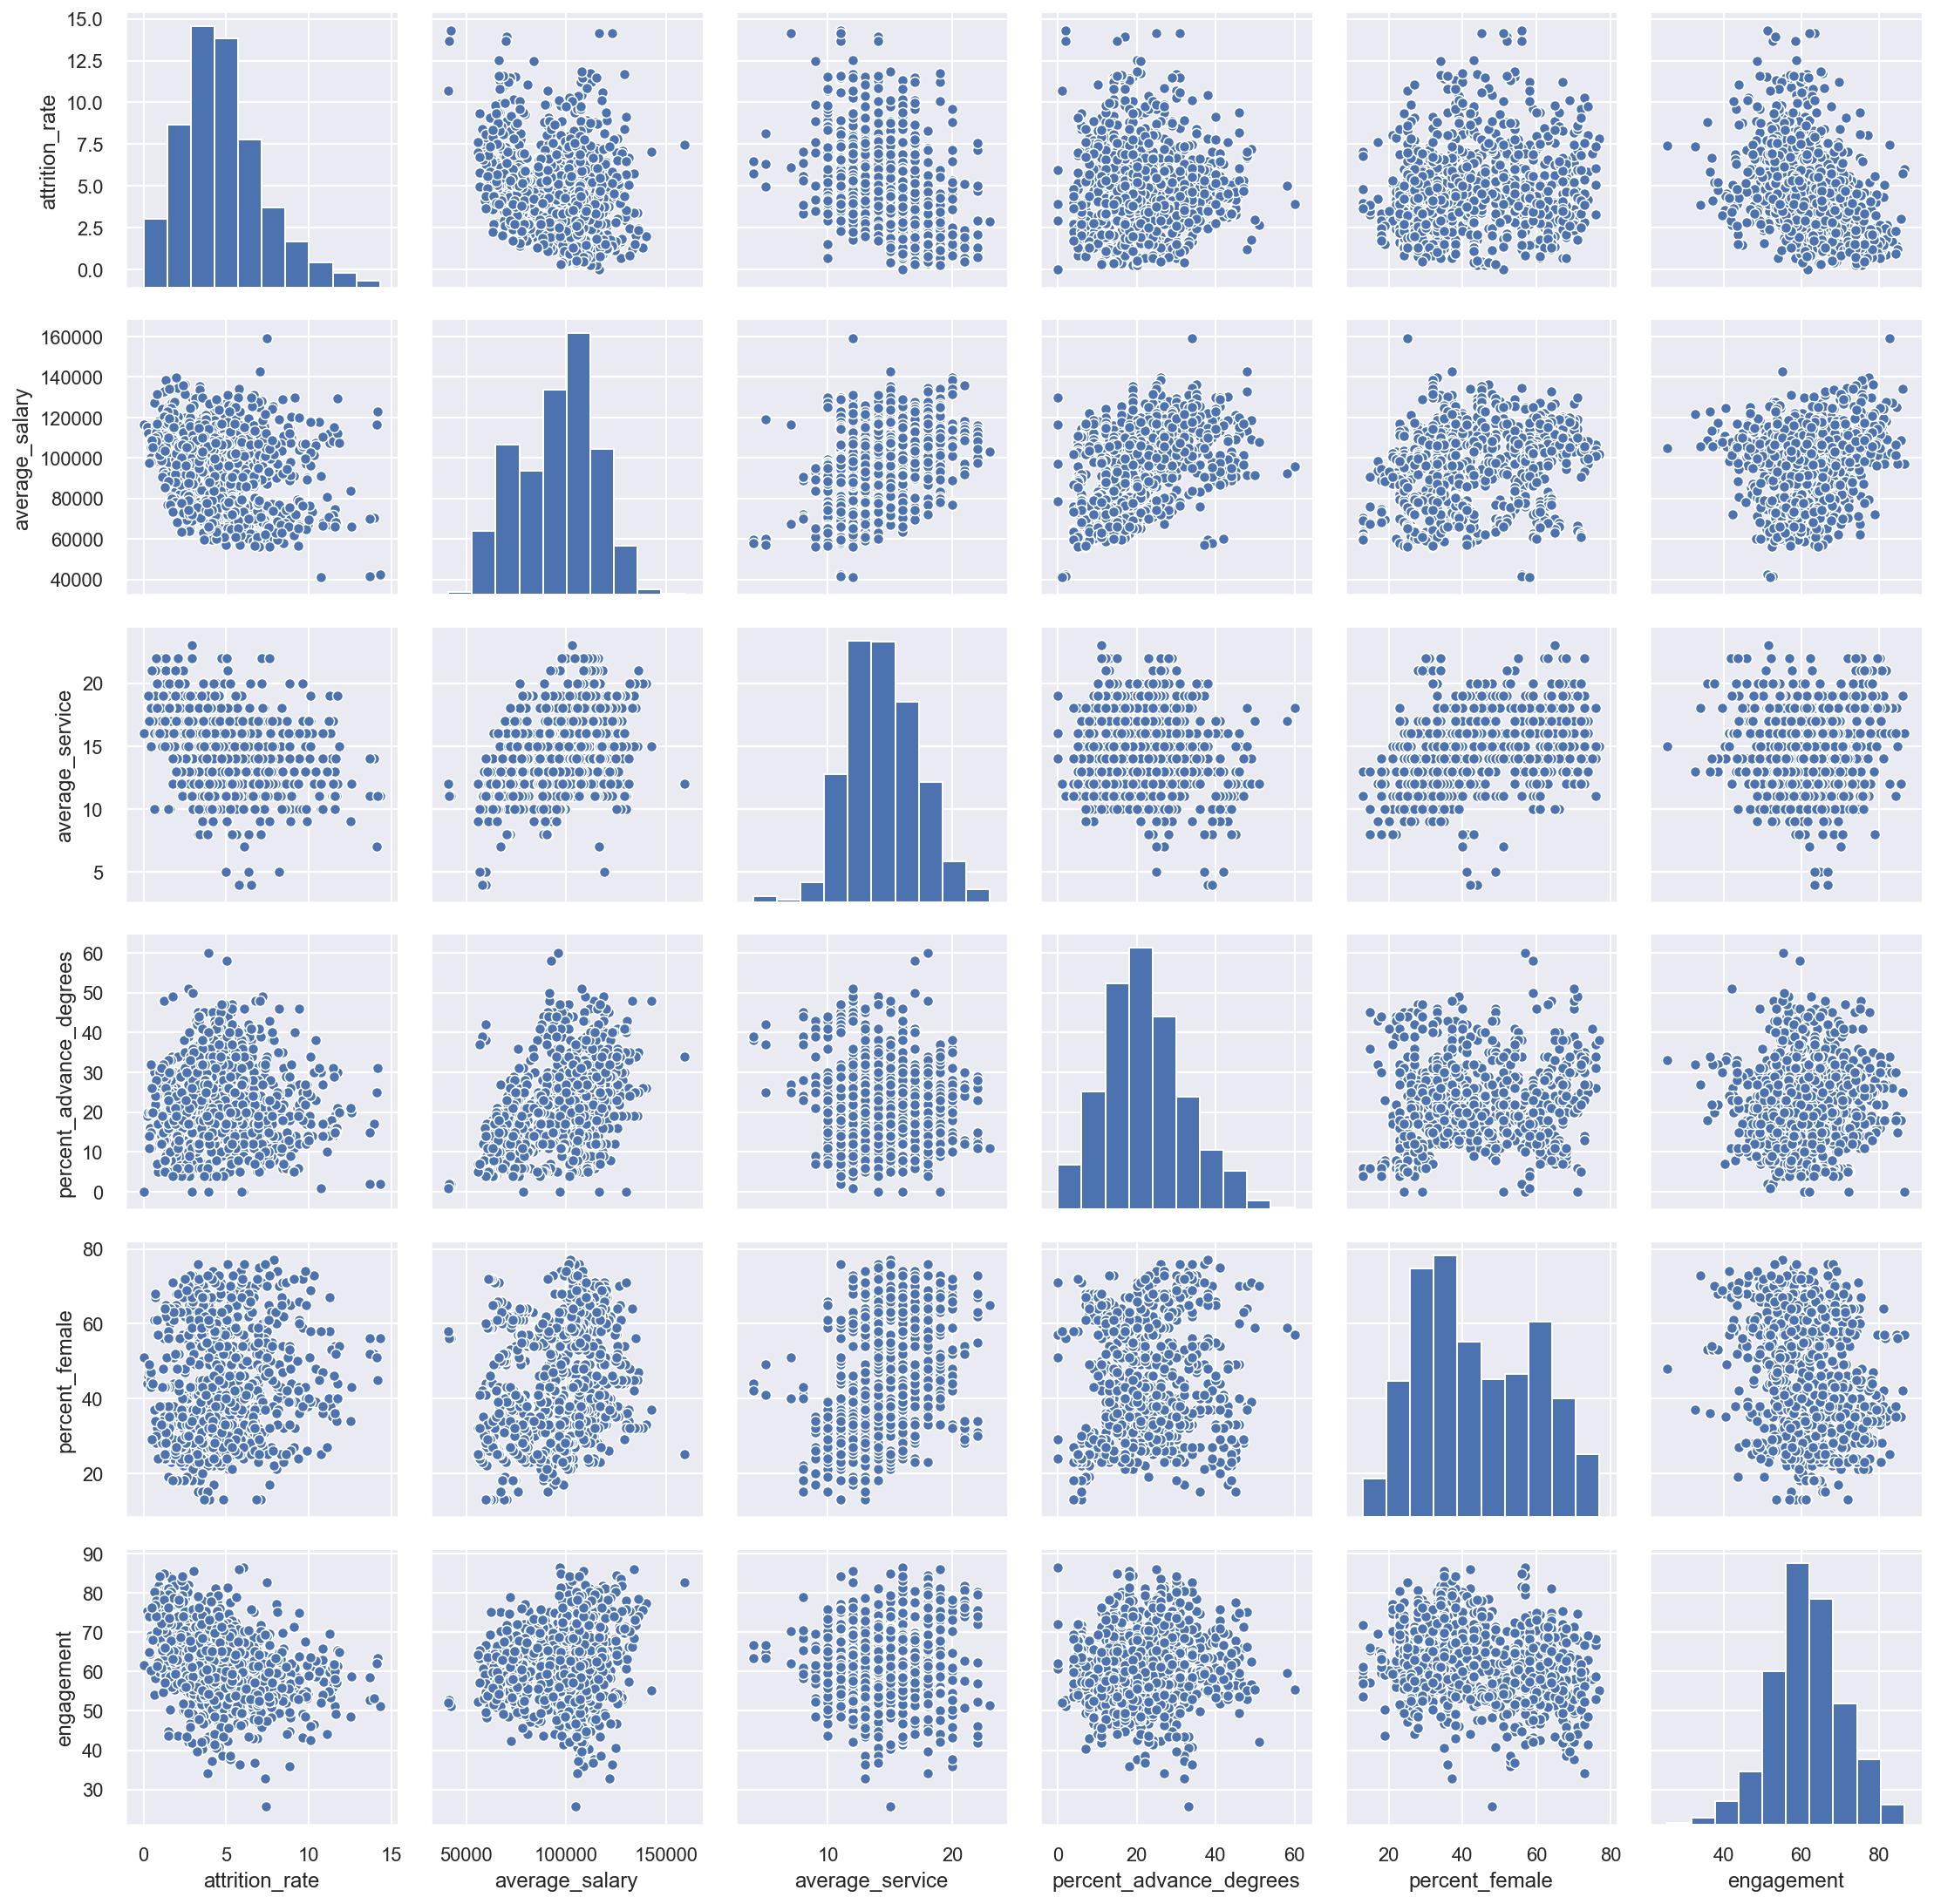

In [16]:
sns.pairplot(df1, kind="scatter")

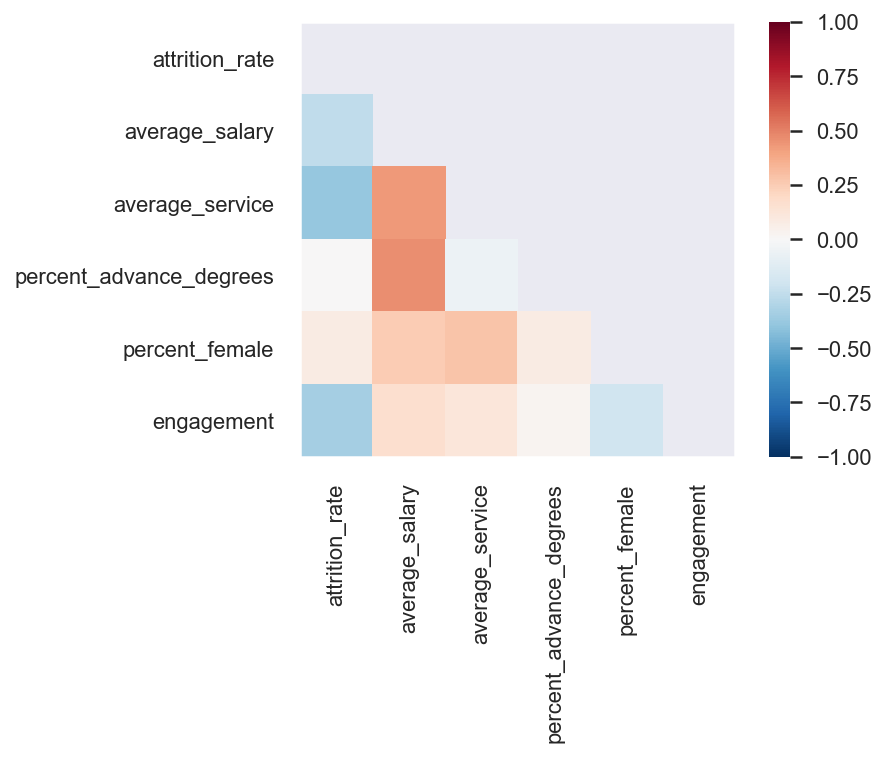

In [17]:
from yellowbrick.features import rank2d
visualizer = rank2d(df1)

In [18]:
df1.corr()

,attrition_rate,average_salary,average_service,percent_advance_degrees,percent_female,engagement
attrition_rate,1.00,-0.26,-0.39,0.00,0.08,-0.34
average_salary,-0.26,1.00,0.43,0.47,0.26,0.17
average_service,-0.39,0.43,1.00,-0.06,0.29,0.12
percent_advance_degrees,0.00,0.47,-0.06,1.00,0.08,0.03
percent_female,0.08,0.26,0.29,0.08,1.00,-0.20
engagement,-0.34,0.17,0.12,0.03,-0.20,1.00


In [19]:
# Standard/traditional linear regression model
import statsmodels.api as sm 
XA = sm.add_constant(X) 
model = sm.OLS(y, XA).fit()
predictions = model.predict(XA)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         attrition_rate   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     51.28
Date:                Thu, 30 Apr 2020   Prob (F-statistic):           4.33e-39
Time:                        10:06:34   Log-Likelihood:                -2124.1
No. Observations:                 946   AIC:                             4258.
Df Residuals:                     941   BIC:                             4282.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      11.9798      0.637     18.794      0.000      10.729      13.231
average_salary          -3.905e-05   4.65e-06     -8.402      0.000   -4.82e-05   -2.99e-05
percent_advance_degrees     0.0344      0.008      4.186      0.000       0.018       0.051
percent_female              0.0143      0.005      2.739      0.006       0.004       0.024
engagement                 -0.0775      0.009     -8.971      0.000      -0.094      -0.061
==============================================================================
Omnibus:                      130.003   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.275
Skew:                           0.932   Prob(JB):                     3.24e-44
Kurtosis:                       4.267   Cond. No.                     8.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
# Checking for multicollinearity in the model (and finding it...)
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,34.30,average_salary
1,7.00,percent_advance_degrees
2,9.00,percent_female
3,20.20,engagement


ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=42, selection='cyclic', tol=0.0001, warm_start=False)

0.19641863996594655
0.12385914800820697


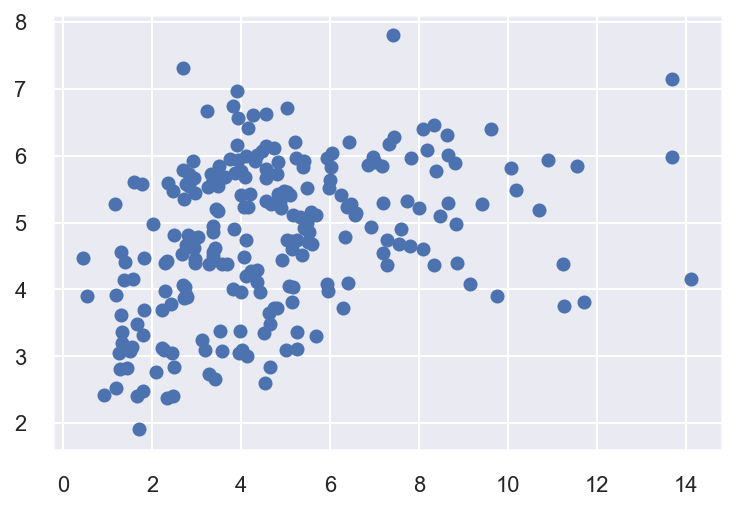

In [21]:
# Elastic Net regression using SKLearn
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
en = ElasticNet(alpha = .5, random_state=42)
en.fit(X_train, y_train)
y_predict = en.predict(X_test)
print(en.score(X_train,y_train))
print(en.score(X_test, y_test))
plt.scatter(y_test, y_predict)

In [22]:
# Scaling the features 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled

StandardScaler(copy=True, with_mean=True, with_std=True)

array([[ 0.5801813 ,  1.49694041,  2.09800757,  0.56272976],
       [-0.06554642,  2.0811424 , -0.38060345,  0.01065524],
       [ 1.62703897,  0.03643543,  1.70664794,  1.08688834],
       ...,
       [-1.14141271, -0.74250056,  1.11960848, -0.39118742],
       [-0.92519971, -0.25566556,  0.72824885, -0.12561864],
       [-0.10703186, -0.64513356,  0.206436  , -0.87861449]])

ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=42, selection='cyclic', tol=0.0001, warm_start=False)

0.13838837569213214
0.10813113998553203


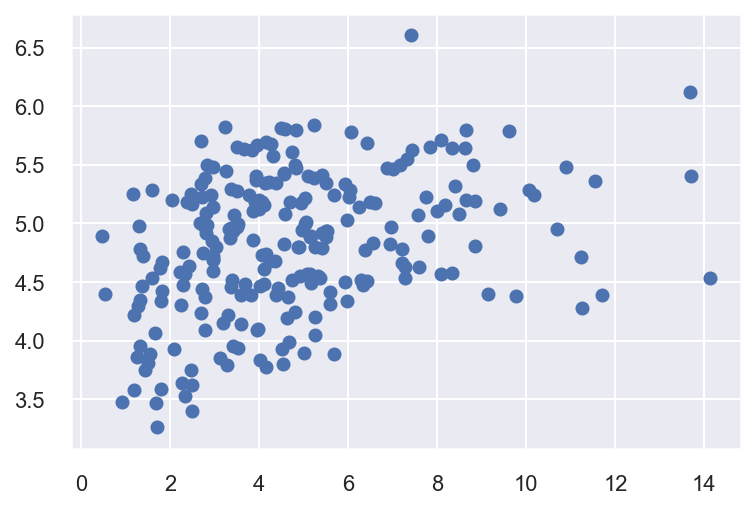

In [23]:
# Re-running Elastic Net regression on standardized variables
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=42)
en = ElasticNet(alpha = .5, random_state=42)
en.fit(X_train, y_train)
y_predict = en.predict(X_test)
print(en.score(X_train,y_train))
print(en.score(X_test, y_test))
plt.scatter(y_test, y_predict)

C:\Users\Jungd\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


PredictionError(alpha=0.75,
                ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE913635C8>,
                bestfit=True, identity=True, is_fitted='auto', model=None,
                shared_limits=True)

0.10813113998553203

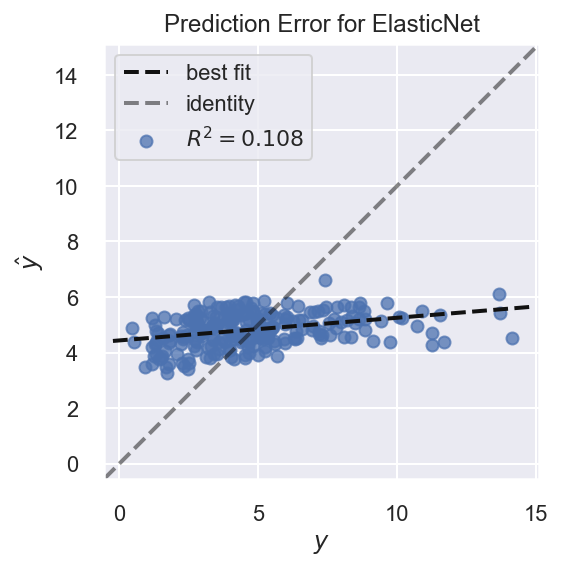

In [24]:
from yellowbrick.regressor import PredictionError

model1 = PredictionError(en)
model1.fit(X_train, y_train)
model1.score(X_test, y_test)
model1.show()

C:\Users\Jungd\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ResidualsPlot(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE938792C8>,
              hist=True, is_fitted='auto', line_color=None, model=None,
              test_alpha=None, test_color=None, train_alpha=None,
              train_color=None)

0.10813113998553203

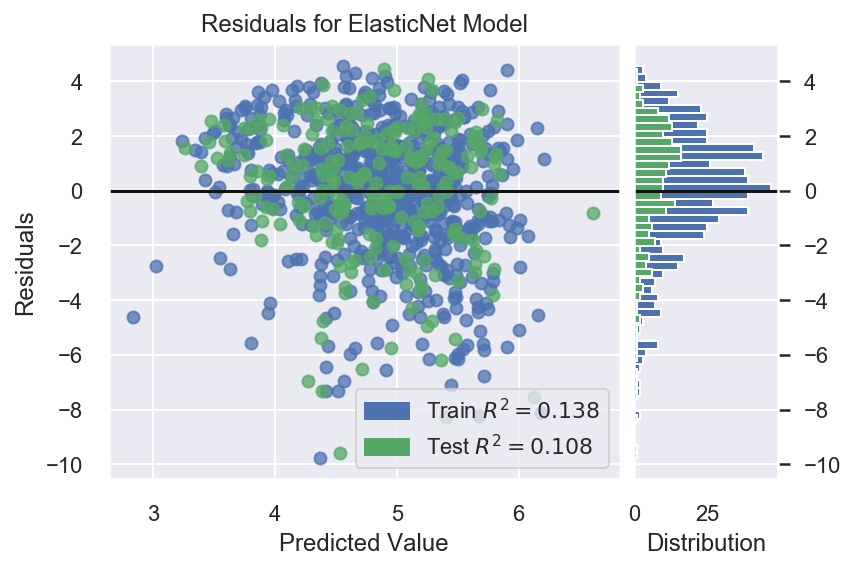

In [25]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(en)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

C:\Users\Jungd\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\Jungd\Anaconda3\lib\site-packages\yellowbrick\regressor\influence.py:183: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  self.distance_, linefmt=self.linefmt, markerfmt=self.markerfmt


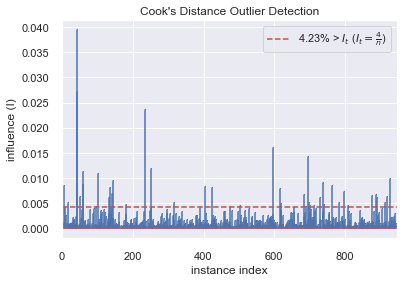

In [73]:
from yellowbrick.regressor import CooksDistance
visualizer = CooksDistance()
visualizer.fit(X_scaled, y)
visualizer.show()

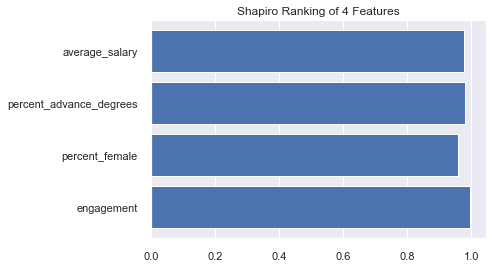

In [76]:
from yellowbrick.features import Rank1D

visualizer = Rank1D(algorithm='shapiro')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()  

C:\Users\Jungd\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


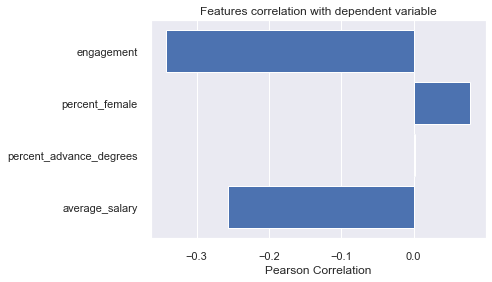

In [77]:
from yellowbrick.target import FeatureCorrelation

features = np.array(X.columns)
visualizer = FeatureCorrelation(labels=features)
visualizer.fit(X_scaled, y)        # Fit the data to the visualizer
visualizer.show() 

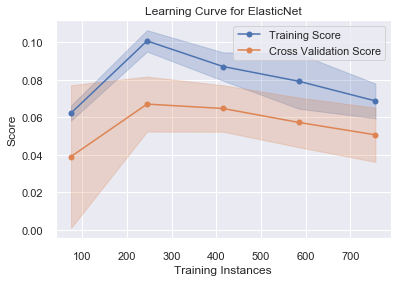

In [78]:
from yellowbrick.model_selection import LearningCurve

model = ElasticNet()
visualizer = LearningCurve(model, scoring='r2')
visualizer.fit(X_scaled, y)        # Fit the data to the visualizer
visualizer.show() 

C:\Users\Jungd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


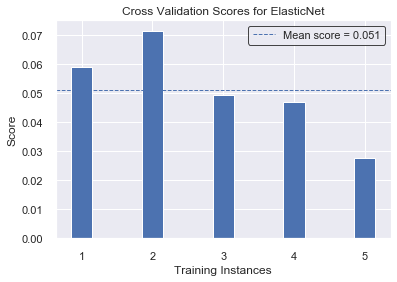

In [79]:
from sklearn.model_selection import KFold
from yellowbrick.model_selection import CVScores

cv = KFold(n_splits=5, random_state=42)
model = ElasticNet()
visualizer = CVScores(model, cv=cv, scoring='r2')
visualizer.fit(X_scaled, y)        # Fit the data to the visualizer
visualizer.show() 

C:\Users\Jungd\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


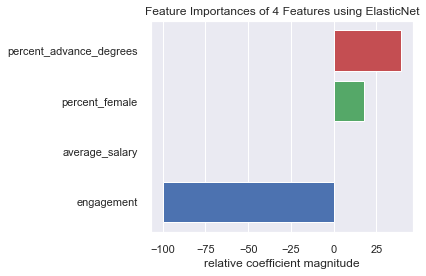

In [81]:
from yellowbrick.model_selection import FeatureImportances

model = ElasticNet()
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

C:\Users\Jungd\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\Jungd\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


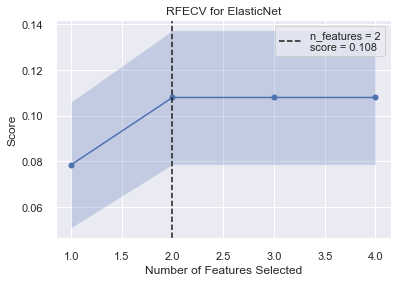

In [82]:
from yellowbrick.model_selection import RFECV

visualizer = RFECV(ElasticNet(alpha=.5, random_state=42))
visualizer.fit(X_scaled, y)        # Fit the data to the visualizer
visualizer.show()  

## Model 2: Demographic(4) + All Survey Questions(71) = Attrition(1)

In [23]:
XB = df.drop(columns="attrition_rate")

In [24]:
XB = XB.drop(columns=["agency", "agency_code", "employment_count", "quit_count", "year"])

In [25]:
XB.describe()

,average_salary,average_service,percent_advance_degrees,percent_female,1,2,3,4,5,6,...,63,64,65,66,67,68,69,70,71,engagement
count,946.00,946.00,946.00,946.00,946.00,946.00,946.00,946.00,946.00,946.00,...,946.00,946.00,946.00,946.00,946.00,946.00,946.00,946.00,946.00,946.00
mean,95296.83,14.46,21.63,43.84,64.78,71.09,61.07,71.91,81.62,77.77,...,52.76,49.95,49.48,44.63,34.24,50.74,64.68,59.57,57.39,61.68
std,19245.84,2.96,10.28,15.34,9.34,7.35,8.63,5.97,4.65,5.62,...,8.25,9.22,8.70,9.66,8.43,9.81,7.47,8.77,9.80,9.08
min,41135.00,4.00,0.00,13.00,34.15,45.63,30.23,50.61,60.78,52.44,...,27.21,20.61,24.39,14.63,12.27,23.59,35.37,34.46,18.90,25.61
25%,79051.00,12.00,14.00,32.00,58.17,66.92,55.93,68.40,78.80,74.80,...,47.53,43.78,43.73,38.24,28.53,44.30,60.05,53.53,51.07,56.02
50%,98005.50,14.00,21.00,41.00,64.50,70.75,60.72,71.69,82.18,78.09,...,52.22,48.80,48.70,43.78,33.64,49.94,64.38,59.31,56.85,61.42
75%,109386.75,16.00,28.00,57.00,70.60,75.46,65.96,75.53,84.77,81.38,...,57.65,55.00,55.00,50.70,38.92,56.66,69.18,65.79,63.57,67.49
max,159253.00,23.00,60.00,77.00,90.00,94.23,86.79,94.52,96.69,95.59,...,86.79,84.91,90.57,79.75,65.38,82.89,88.68,86.79,88.61,86.55


In [26]:
XB = XB.drop(columns=["engagement"])

In [83]:
XB = XB.drop(columns=["average_service"])

In [84]:
scaler = StandardScaler()
scaler.fit(XB)
XB_scaled = scaler.transform(XB)
XB_scaled

array([[ 0.5801813 ,  1.49694041,  2.09800757, ...,  0.67900613,
         0.82518943,  0.56194725],
       [-0.06554642,  2.0811424 , -0.38060345, ...,  0.18482545,
         0.90618804,  0.01864057],
       [ 1.62703897,  0.03643543,  1.70664794, ...,  0.92408761,
         0.78297889,  1.07972261],
       ...,
       [-1.14141271, -0.74250056,  1.11960848, ..., -0.56247217,
        -1.8352155 , -0.62679143],
       [-0.92519971, -0.25566556,  0.72824885, ..., -0.43524408,
        -0.41945113,  0.02987435],
       [-0.10703186, -0.64513356,  0.206436  , ..., -1.17048851,
        -0.81645838, -0.87291344]])

0.4274684532457763
0.28662933375008715


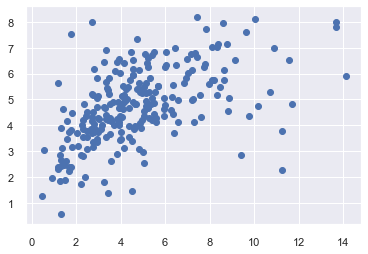

In [85]:
X_train,X_test,y_train,y_test=train_test_split(XB,y,test_size=0.25,random_state=42)
en = ElasticNet(alpha = .5, random_state=42)
en.fit(X_train, y_train)
y_predict = en.predict(X_test)
print(en.score(X_train,y_train))
print(en.score(X_test, y_test))
plt.scatter(y_test, y_predict)

0.19018424274581247
0.1335148858246551


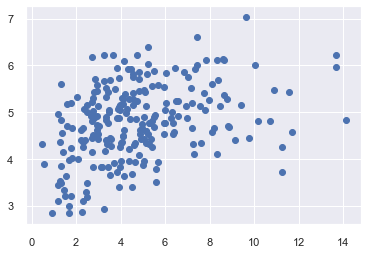

In [86]:
X_train,X_test,y_train,y_test=train_test_split(XB_scaled,y,test_size=0.25,random_state=42)
en = ElasticNet(alpha = .5, random_state=42)
en.fit(X_train, y_train)
y_predict = en.predict(X_test)
print(en.score(X_train,y_train))
print(en.score(X_test, y_test))
plt.scatter(y_test, y_predict)

C:\Users\Jungd\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


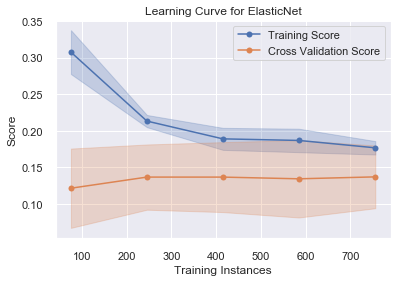

In [87]:
model = ElasticNet(alpha=.5, random_state=42)
visualizer = LearningCurve(model, scoring='r2')
visualizer.fit(XB_scaled, y)        # Fit the data to the visualizer
visualizer.show() 

C:\Users\Jungd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


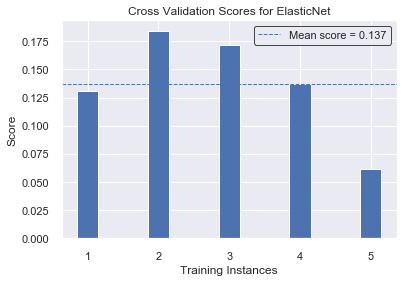

In [88]:
cv = KFold(n_splits=5, random_state=42)
model = ElasticNet(alpha=.5, random_state=42)
visualizer = CVScores(model, cv=cv, scoring='r2')
visualizer.fit(XB_scaled, y)        # Fit the data to the visualizer
visualizer.show() 

C:\Users\Jungd\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\Jungd\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


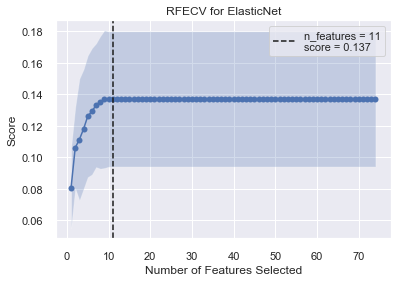

In [89]:
visualizer = RFECV(ElasticNet(alpha=.5, random_state=42))
visualizer.fit(XB_scaled, y)        # Fit the data to the visualizer
visualizer.show()  

In [90]:
en.coef_

array([-0.11364615,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.01652555,  0.        , -0.02053151,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.01971897, -0.        ,
        0.        ,  0.        , -0.        , -0.1149883 , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.21523972,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.08594478, -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.15535882, -0.        , -0.06451057,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.  

In [91]:
dfm = pd.DataFrame(en.coef_, columns=["Weights"])

In [92]:
XB.columns

Index(['average_salary', 'percent_advance_degrees', 'percent_female', '1', '2',
       '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15',
       '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27',
       '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39',
       '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51',
       '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63',
       '64', '65', '66', '67', '68', '69', '70', '71'],
      dtype='object')

In [93]:
dfm["Features"] = ['average_salary', 'percent_advance_degrees', 'percent_female', '1', '2',
       '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15',
       '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27',
       '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39',
       '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51',
       '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63',
       '64', '65', '66', '67', '68', '69', '70', '71']

In [94]:
dfm1 = dfm.sort_values(by=["Weights"], ascending=False)

In [38]:
pd.options.display.max_rows = 80

In [95]:
dfm1.tail(15)

,Weights,Features
4,-0.00,2
27,-0.00,25
26,0.00,24
25,0.00,23
24,-0.00,22
22,-0.00,20
12,-0.02,10
54,-0.06,52
42,-0.09,40
71,-0.11,69


## Testing New Compressed Model with only those features given weights by Elastic Net

In [96]:
XC = df[['average_salary', '10', '69', '52', '50', '70', '40', '26', '34']]

In [97]:
scaler.fit(XC)
XC_scaled = scaler.transform(XC)
XC_scaled

array([[ 0.5801813 , -0.02021295,  0.67900613, ...,  0.43566421,
         0.55243878, -0.63454   ],
       [-0.06554642, -0.40548972,  0.18482545, ..., -0.11677545,
        -0.5273645 , -0.11475564],
       [ 1.62703897,  0.82213129,  0.92408761, ...,  1.11198984,
         1.27525791,  0.24962927],
       ...,
       [-1.14141271, -0.38514902, -0.56247217, ..., -0.02867876,
        -0.70438143, -0.24229036],
       [-0.92519971, -0.38873856, -0.43524408, ..., -0.04244387,
         0.09071962,  0.08029746],
       [-0.10703186,  0.09225915, -1.17048851, ..., -0.60864864,
        -0.42115434, -0.95391266]])

0.21379167485963868
0.13513750330856933


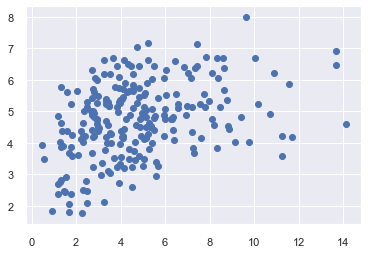

In [100]:
X_train,X_test,y_train,y_test=train_test_split(XC,y,test_size=0.25,random_state=42)
en = ElasticNet(alpha = .5, random_state=42)
en.fit(X_train, y_train)
y_predict = en.predict(X_test)
print(en.score(X_train,y_train))
print(en.score(X_test, y_test))
plt.scatter(y_test, y_predict)

0.18526112629758407
0.12965824498328216


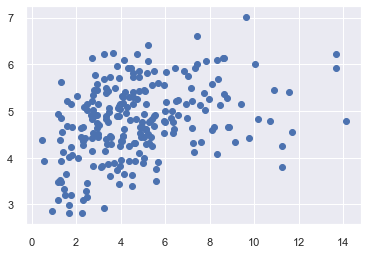

In [116]:
X_train,X_test,y_train,y_test=train_test_split(XC_scaled,y,test_size=0.25,random_state=42)
en = ElasticNet(alpha = .5, random_state=42)
en.fit(X_train, y_train)
y_predict = en.predict(X_test)
print(en.score(X_train,y_train))
print(en.score(X_test, y_test))
plt.scatter(y_test, y_predict)

In [102]:
XC.shape

(946, 9)

In [103]:
XC.columns

Index(['average_salary', '10', '69', '52', '50', '70', '40', '26', '34'], dtype='object')

C:\Users\Jungd\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\Jungd\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


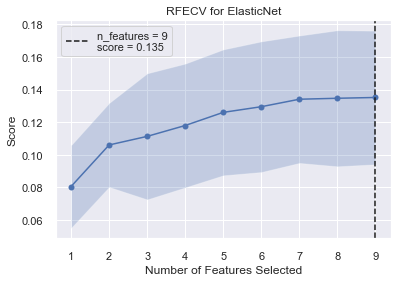

In [104]:
visualizer = RFECV(ElasticNet(alpha=.5, random_state=42))
visualizer.fit(XC_scaled, y)        # Fit the data to the visualizer
visualizer.show()  

In [105]:
en.coef_

array([-0.11197365, -0.01763617, -0.10480043, -0.06245892, -0.15801004,
       -0.16557657, -0.07897375, -0.11235688, -0.21113618])

In [106]:
dfn = pd.DataFrame(en.coef_, columns=["Weights"])

In [107]:
XC.columns

Index(['average_salary', '10', '69', '52', '50', '70', '40', '26', '34'], dtype='object')

In [108]:
dfn["Features"] = ['average_salary', '10', '69', '52', '50', '70', '40', '26', '34']

In [109]:
dfn1 = dfn.sort_values(by=["Weights"], ascending=False)

In [111]:
dfn1

,Weights,Features
1,-0.02,10
3,-0.06,52
6,-0.08,40
2,-0.10,69
0,-0.11,average_salary
7,-0.11,26
4,-0.16,50
5,-0.17,70
8,-0.21,34


## Principal Component Analysis testing

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(XB_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [48]:
principalDf

,principal component 1,principal component 2,principal component 3
0,0.58,1.92,0.58
1,1.73,-1.16,-2.01
2,6.79,3.08,-0.16
3,1.77,-3.15,-0.99
4,1.41,-3.22,0.27
...,...,...,...
941,-6.70,0.45,2.57
942,-4.31,0.86,0.40
943,-5.55,-2.77,3.24
944,-3.15,-0.70,2.62


In [49]:
pca.explained_variance_ratio_

array([0.56698673, 0.06952156, 0.03816221])

## Further testing

0.19641863996594655
0.12385914800820697


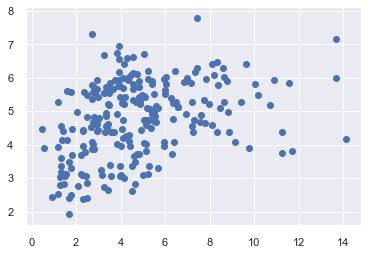

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X5,y,test_size=0.25,random_state=42)
en = ElasticNet(alpha = .5, random_state=42)
en.fit(X_train, y_train)
y_predict = en.predict(X_test)
print(en.score(X_train,y_train))
print(en.score(X_test, y_test))
plt.scatter(y_test, y_predict)

In [51]:
!pip install factor-analyzer

  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40383 sha256=91cb82fa730544a3faa9fa632fe636f360ff1f2d49bd360b65755a9b1eda8cfc
  Stored in directory: c:\users\jungd\appdata\local\pip\cache\wheels\8d\9e\4c\fd4cb92cecf157b13702cc0907e5c56ddc48e5388134dc9f1a
Successfully built factor-analyzer


In [52]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(rotation="varimax")
print(fa.fit(XB))
print(fa.loadings_)
print(fa.get_communalities())

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=3, rotation='varimax',
               rotation_kwargs={}, use_smc=True)
[[ 6.64937810e-01 -1.27397888e-01 -1.38618940e-01]
 [ 4.09707293e-01 -3.35763447e-01  6.20085556e-02]
 [ 3.98097322e-01  2.20856144e-01 -3.42171347e-01]
 [ 1.89037386e-01 -5.12023591e-01 -4.85124998e-02]
 [ 6.72526175e-01  3.31577910e-01  4.46849312e-01]
 [ 2.94969526e-01  5.87306101e-01  5.58615717e-01]
 [ 5.01847233e-01  5.22915174e-01  3.93589901e-01]
 [ 3.86255348e-01  2.82309692e-01  6.10751070e-01]
 [-5.04914277e-02  3.38765095e-01  5.37016989e-01]
 [ 1.52689790e-01  4.00171600e-01  6.71737894e-01]
 [ 2.99591872e-01  2.94442598e-01  2.02077644e-01]
 [ 2.02828466e-04  4.31104838e-01  3.37159981e-01]
 [ 3.45528280e-01  3.10295044e-01  5.93700333e-01]
 [ 2.13114103e-01  4.18774685e-01  4.50193398e-01]
 [ 3.51781068e-01  4.91221194e-01  6.59402460e-01]
 [ 1.57960434e-01  4.39582330e-01  6.46062646e-0

In [53]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(XB_scaled)

kmo_model

C:\Users\Jungd\Anaconda3\lib\site-packages\factor_analyzer\utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


0.9799121621491033

In [54]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(XB, 25)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
print(ev)

[4.25240045e+01 5.21411710e+00 2.86216543e+00 2.02140545e+00
 1.87759397e+00 1.60850129e+00 1.34350174e+00 1.22489725e+00
 1.19714459e+00 1.10745018e+00 9.13758794e-01 7.86078818e-01
 6.91158514e-01 6.76788075e-01 6.36107456e-01 5.83724411e-01
 4.92105926e-01 4.67639785e-01 4.50156600e-01 4.25641365e-01
 3.85738604e-01 3.64332653e-01 3.42772277e-01 3.22458967e-01
 3.16431242e-01 3.02576527e-01 2.91150195e-01 2.72703076e-01
 2.51076815e-01 2.40200735e-01 2.34934167e-01 2.20689489e-01
 2.14378550e-01 2.03760408e-01 1.91825994e-01 1.78201807e-01
 1.72176601e-01 1.70757435e-01 1.58210085e-01 1.57429297e-01
 1.47738599e-01 1.44603708e-01 1.42403608e-01 1.40730557e-01
 1.35277032e-01 1.26962054e-01 1.22950111e-01 1.17322833e-01
 1.14078806e-01 1.09460490e-01 9.96230298e-02 9.72706914e-02
 9.46405580e-02 9.06251204e-02 8.66327140e-02 8.41181026e-02
 8.24887293e-02 8.06066499e-02 7.54118983e-02 7.15559905e-02
 7.11908959e-02 6.79210917e-02 6.19825858e-02 5.90877282e-02
 5.71928713e-02 5.499122

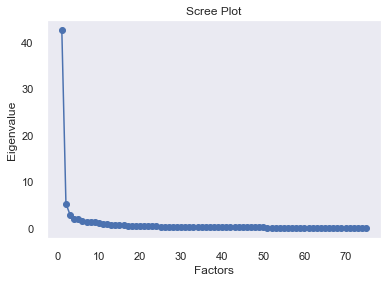

In [55]:
plt.scatter(range(1,XB.shape[1]+1),ev)
plt.plot(range(1,XB.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

C:\Users\Jungd\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


PCA(alpha=0.75,
    ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000014CCA1C1470>,
    classes=None, colorbar=True, colormap='RdBu', colors=None, features=None,
    heatmap=False, proj_features=False, projection=2, random_state=None,
    scale=True)

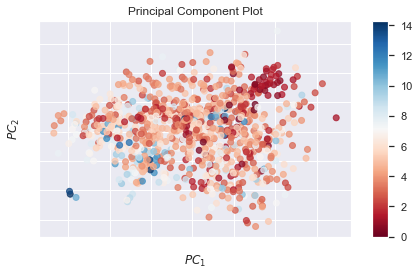

In [56]:
from yellowbrick.features import pca_decomposition
# Create, fit, and show the visualizer
pca_decomposition(X, y, scale=True)

In [57]:
df.groupby("year").mean()

,employment_count,quit_count,attrition_rate,average_salary,average_service,percent_advance_degrees,percent_female,1,2,3,...,63,64,65,66,67,68,69,70,71,engagement
year,,,,,,,,,,,,,,,,,,,,,
2013,7219.84,280.55,4.50,91764.17,14.47,20.35,44.25,61.38,70.00,58.57,...,50.59,48.80,45.90,42.93,31.64,46.60,62.48,54.94,54.74,59.41
2014,6951.82,314.05,5.04,93443.76,14.40,21.28,43.74,61.98,69.69,58.78,...,50.46,47.16,46.48,42.09,32.06,47.68,62.35,57.56,54.89,59.33
2015,7126.10,328.58,5.16,94291.87,14.38,21.74,44.03,64.49,71.11,60.67,...,52.35,49.39,49.43,44.10,34.07,51.04,64.58,59.75,57.18,61.44
2016,7644.98,332.38,4.75,96207.10,14.37,21.89,42.95,66.88,71.48,62.01,...,53.93,50.33,50.85,45.57,35.90,53.19,65.83,61.05,58.49,62.74
2017,6815.24,307.65,4.78,100474.67,14.68,22.79,44.11,69.05,73.06,65.13,...,56.34,53.87,54.49,48.33,37.44,55.09,68.03,64.28,61.44,65.33
